In [ ]:
'''
【项目05】  多场景下的算法构建

课程数据：
某公司A,B产品在2018年1,2,3月的销量数据，数据格式为xlsx

作业要求：
1、批量读取数据，并输出以下信息
（1）数据量
（2）数据字段columns
（3）输出每个文件分别有多少缺失值
要求：
① 创建独立函数，从读取数据到以上输出要求
② 运行代码多次调用创建函数，对数据进行批量处理
提示：
① 将课程excel数据放入单独文件夹(建议英文路径)，函数中通过input来输入excel数据所在文件夹路径，再通过遍历来读取文件
② pd.read_excel()中用“index_col”参数，将第一列变为index
③ os.walk(path) → 返回路径中的信息及文件，结果为一个生成器
④ 定位缺失值位置：data[data.isnull().values == True]

2、批量读取数据，用均值填充缺失值数据，并完成以下计算及图表制作
（1）读取数据并用均值填充缺失值；对“日期”字段进行时间序列处理，转换成日period ，最后输出三个Dataframe文件data1,data2,data3
（2）分别计算data1，data2，data3中A,B产品的月总销量，并绘制多系列柱状图，存储在对应的图片文件夹路径
（3）分别计算A产品在每个月中哪一天超过了月度80%的销量，输出日期
要求：
① 分别创建四个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 时间序列转换方法提示：pd.to_period
② 时间戳Timestampe转化成字符串用str()方法

3、读取数据并合并，做散点图观察A,B产品销量，并做回归，预测当A销量为1200时，B产品销量值
（1）读取数据删除缺失值；对“日期”字段进行时间序列处理，转换成日period ，合并三个月数据，输出data；
（2）针对A产品销量和B产品销量数据做回归分析，制作散点图并存储，并预测当A销量为1200时，B产品销量值
要求：
① 分别创建两个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 用pd.dripna方法去掉缺失值，注意inplace参数

'''

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
% matplotlib inline

from sklearn.linear_model import LinearRegression
# 导入线性回归模块

In [20]:
#第一题

def data_read():  #数据读取函数
    dress = input('请输入你的文件地址:')
    for root, dirs, files in os.walk(dress):
        for name in files:
            data = pd.read_excel(os.path.join(root,name),encoding = 'python',index_col=0)
            print(name + '数据的数据量为：',len(data))
            print(name + '数据的数据字段为',data.columns[0])
            print(name + '数据的缺失值数量为：',len(data[data.isnull().values == True]))
            print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
data_read()
print('finished')

请输入你的文件地址:C:\Users\acer\Desktop\xiangmu5
data01.xlsx数据的数据量为： 31
data01.xlsx数据的数据字段为 productA
data01.xlsx数据的缺失值数量为： 3
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
data02.xlsx数据的数据量为： 28
data02.xlsx数据的数据字段为 productA
data02.xlsx数据的缺失值数量为： 4
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
data03.xlsx数据的数据量为： 31
data03.xlsx数据的数据字段为 productA
data03.xlsx数据的缺失值数量为： 3
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
finished


In [64]:
#第二题

def to_df():    #转换成dataframe的函数
    data_all = []
    dress = input('请输入你的文件地址:')
    for root, dirs, files in os.walk(dress):
        for name in files:
                data = pd.read_excel(os.path.join(root,name),encoding = 'python',index_col=0)
                data_n = pd.DataFrame(data)
                data_n.to_period()
                data_n['productA'].fillna(data_n['productA'].mean(),inplace = True)
                data_n['productB'].fillna(data_n['productB'].mean(),inplace = True)
                data_all.append(data_n)
    return(data_all)


def paintting(datas):  #绘图函数
    path = r'C:\Users\acer\Desktop\xiangmu5'
    plt.figure()
    product_sum = []
    for data in datas:
        pro_sum = data.sum()[['productA','productB']]
        product_sum.append(pro_sum)
    product_sums = pd.DataFrame(product_sum,index = pd.period_range('201801','201803',freq = 'M') )
    product_sums.plot(kind = 'bar',grid = True,
                     figsize = (8,6),
                     title = 'A、B产品1,2,3,月总销售柱状图',
                     style = '--k')
    plt.legend(loc = 'upper center')
    plt.savefig(path + 'A,B产品1,2,3月总销量柱状图.png',dpi=800)
    
    
    
def sale_cumsum(datas):
    dates = []
    for data in datas:
        data[ 'productA_cumsum'] = data['productA'].cumsum()
        data['productA_p'] = data['productA_cumsum'] / data['productA'].sum()
        for i in range(len(data)):
            if (data['productA_p'].iloc[i] - 0.8) >= 0:
                date_to = data.index[i]   #记录A产品销售量超过%80的日期
                dates.append(date_to)
                break
    return(dates)

请输入你的文件地址:C:\Users\acer\Desktop\xiangmu5
运行函数to_df，得到三组dataFrame文件
运行函数paintting,得到A、B产品1，2，3月的总销售量柱状图
运行函数sale_cumsum,可知
在1月A产品销售量超过%80的日期为： 2018-01-26 00:00:00
2月A产品销售量超过%80的日期为： 2018-02-23 00:00:00
3月A产品销售量超过%80的日期为： 2018-03-25 00:00:00


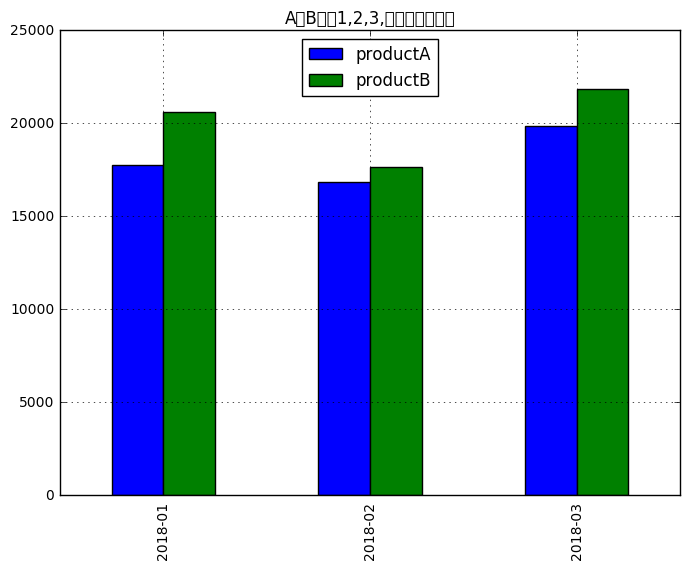

In [70]:
datas = to_df()
print('运行函数to_df，得到三组dataFrame文件')
paintting(datas)
print('运行函数paintting,得到A、B产品1，2，3月的总销售量柱状图')
dates = sale_cumsum(datas)
print('运行函数sale_cumsum,可知\n在1月A产品销售量超过%80的日期为：',dates[0])
print('2月A产品销售量超过%80的日期为：',dates[1])
print('3月A产品销售量超过%80的日期为：',dates[2])

In [100]:
#第三题
def data_merge():  #读取数据并合并
    datas = pd.DataFrame(columns = ['productA','productB'])
    dress = input('请输入你的文件地址:')
    for root, dirs, files in os.walk(dress):
        for name in files:
            data = pd.read_excel(os.path.join(root,name),encoding = 'python',index_col=0,sheetname = 0)
            data.to_period()
            data.dropna(inplace = True)
            datas = pd.concat([datas,data])
    return(datas)


def data_predict(datas):  #线性回归拟合
    path = r'C:\Users\acer\Desktop\xiangmu5'
    plt.scatter(datas['productA'],datas['productB'],color = 'r',alpha = 0.8,marker = 'o')
    plt.grid(linestyle = '--')
    
    model = LinearRegression()
    x_data = datas['productA'][:,np.newaxis]
    y_data = datas['productB']
    model.fit(x_data,y_data)
    #构建回归模型
    y_predict = model.predict(x_data)
    plt.plot(x_data,y_predict,color = 'g')
    plt.title('A产品销量和B产品销量数据回归分析图')
    plt.savefig(path +' A,B产品销量数据回归拟合分析',dpi =800)
    return(model.predict(1200))

请输入你的文件地址:C:\Users\acer\Desktop\xiangmu5
              productA     productB
2018-01-01  270.997943   371.615646
2018-01-02  638.322113   788.081579
2018-01-03  364.454658   454.279288
2018-01-04  251.432000   340.337651
2018-01-05  261.411794   419.372368
2018-01-06  660.963370   758.044832
2018-01-07  733.216003   833.052766
2018-01-08  648.977726   777.371852
2018-01-10  145.618453   309.405608
2018-01-11  859.012821  1010.233897
2018-01-12  906.538309  1056.094597
2018-01-13  813.073077   972.934654
2018-01-14  232.623479   345.475176
2018-01-15   57.412126   156.260509
2018-01-16  848.486545   930.534432
2018-01-17  910.595040   994.613740
2018-01-18  922.407906  1081.802618
2018-01-19  505.462736   604.384189
2018-01-20  304.309366   425.946219
2018-01-22  978.331044  1059.885522
2018-01-23  308.487706   429.754526
2018-01-24  793.876850   929.064237
2018-01-25  237.948887   399.372490
2018-01-26  762.158421   924.633945
2018-01-27   14.956534   149.776056
2018-01-28  997.954720 

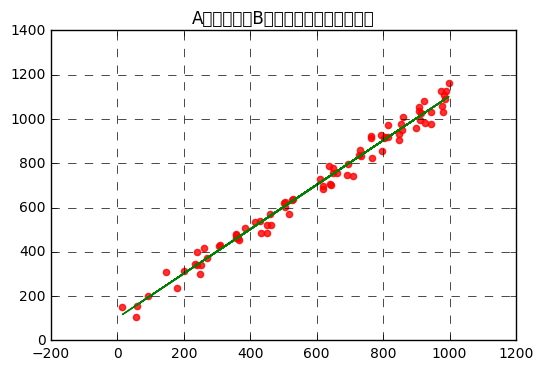

In [102]:
datas = data_merge()
print(datas)
value_pre = data_predict(datas)
print('当A产品的销售量为1200时，B产品的销售量为：%.0f'%value_pre)